[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/MLBasics-Clustering/blob/main/ml-clustering.ipynb)

# Clustering
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!git clone https://www.github.com/azad-academy/MLBasics-DecisionTrees

In [1]:
from methods import *

# Loading Sample Data

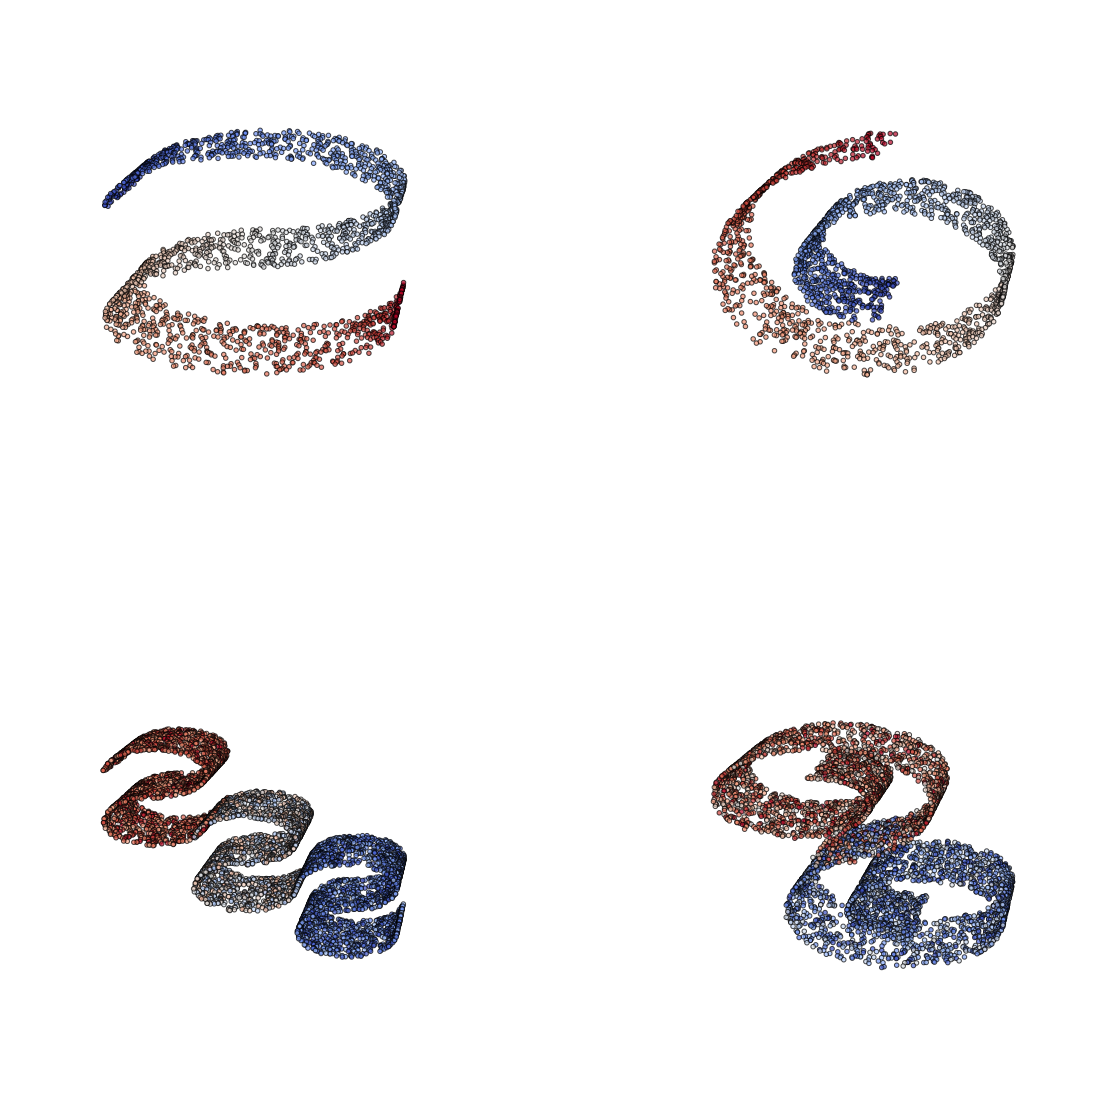

In [2]:
datasets = ['Sine-curve','Swiss-roll','Triple-Sine-Curve','Twin-Roll']
X = [None]*4
Y = [None]*4

fig,axes = plt.subplots(2,2,figsize=(20,20),subplot_kw={"projection": "3d"})
X[0],Y[0] = make_s_curve(2000)
X[1],Y[1] = make_swiss_roll(2000)
X[2],Y[2] = generate_3d_curve(6000,111)
X[3],Y[3] = generate_twin_rolls(5000,111)

for i in range(2):
    for j in range(2):
        plot_data(X[2*i+j],Y[2*i+j],canvas=axes[i][j],view_point=(95,8,10),show_axis=False)



# Principal Component Analysis

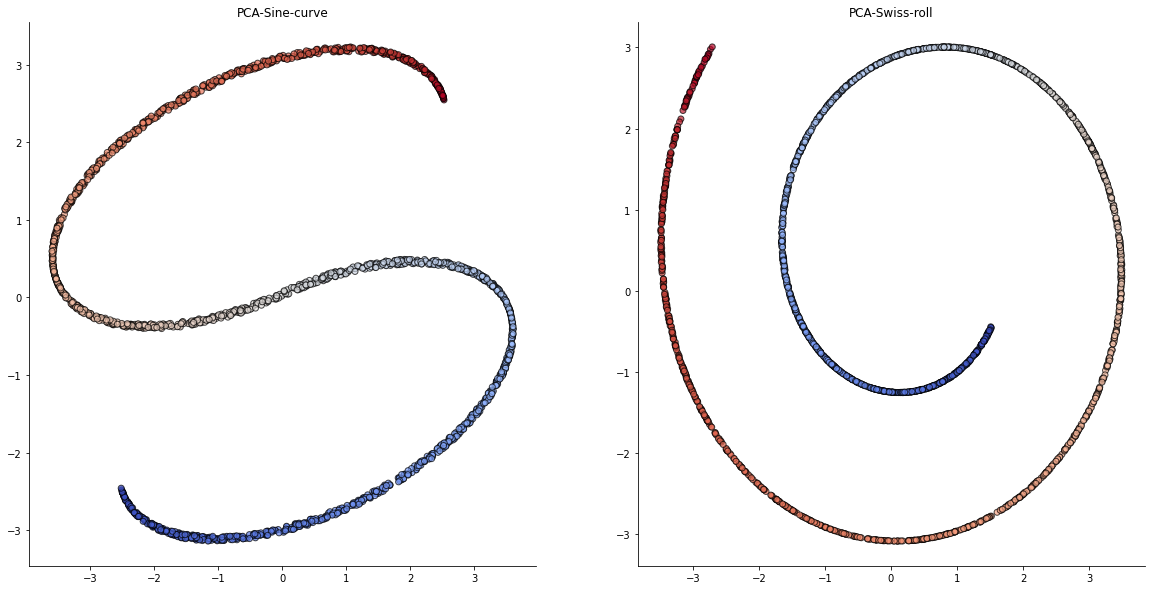

In [5]:
pca_fig,axes = plt.subplots(1,2,figsize=(20,10))
for j in range(2):
    pca = PCA(X[j],2)
    embeddings = pca.project(True)
    plot_data(embeddings,Y[j],canvas=axes[j],plt_title='PCA-'+f'{datasets[j]}')


# Manifold Learning

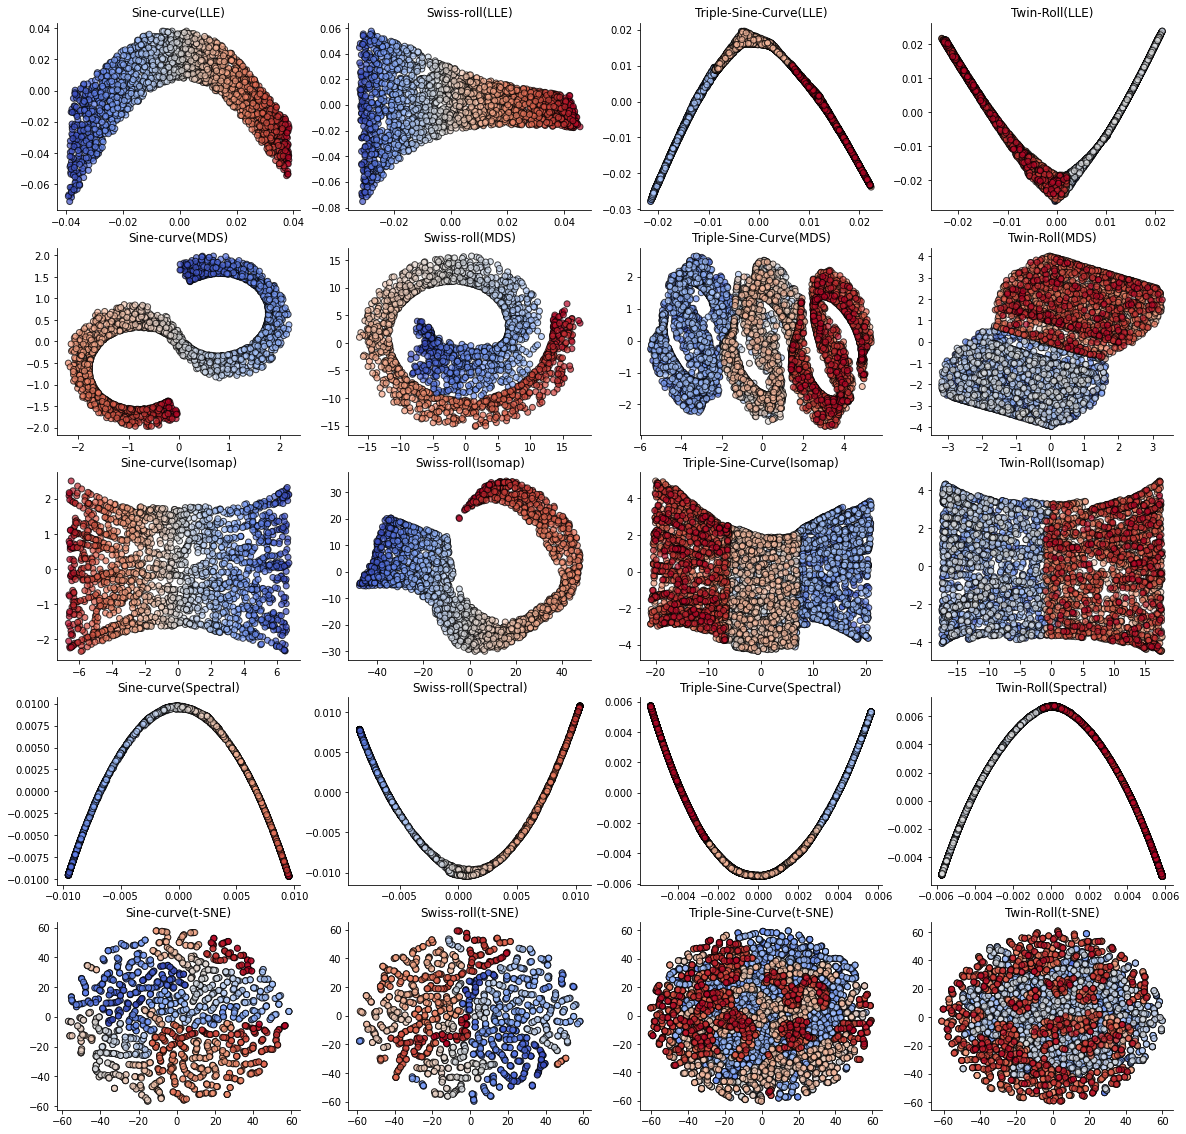

In [3]:
methods = ['LLE','MDS','Isomap','Spectral','t-SNE']
#methods = ['LLE','MDS','Isomap','Spectral']

manifold_fig,axes = plt.subplots(len(methods),len(datasets),figsize=(20,20))

for i in range(len(methods)):
    for j in range(len(datasets)):
        mfl = ManifoldLearning(X[j],2,method=methods[i])
        embeddings = mfl.project()
    
        #plotting the projected data
        plot_data(embeddings,Y[j],canvas=axes[i][j],plt_title=datasets[j]+f'({methods[i]})')
        

array([10.76780463,  9.72701935,  6.45873274, ...,  9.22738464,
       13.72043316,  9.2911012 ])

# Experimenting on Fashion MNIST Dataset


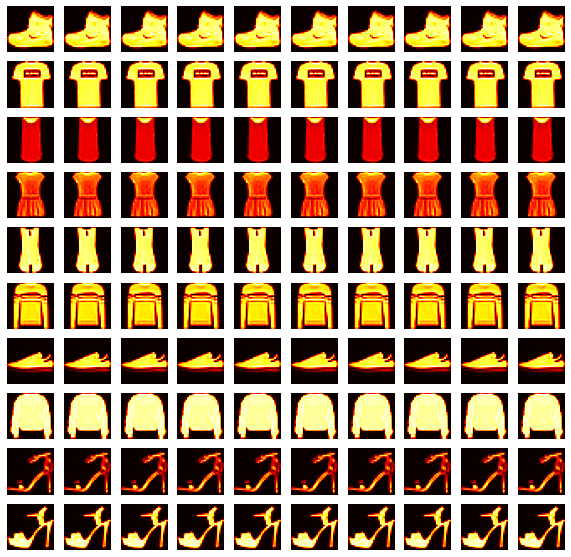

In [2]:
import tensorflow as tf
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()


fig,axes = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax = axes[i][j]
        ax.imshow(X_train[i],cmap=plt.cm.hot)
        ax.set_axis_off()

X = X_test.reshape(len(X_test),28*28)
Y = Y_test

## Running PCA on Fashion-MNIST

In [3]:
pca = PCA(X,2)
pca_embeddings = pca.project()

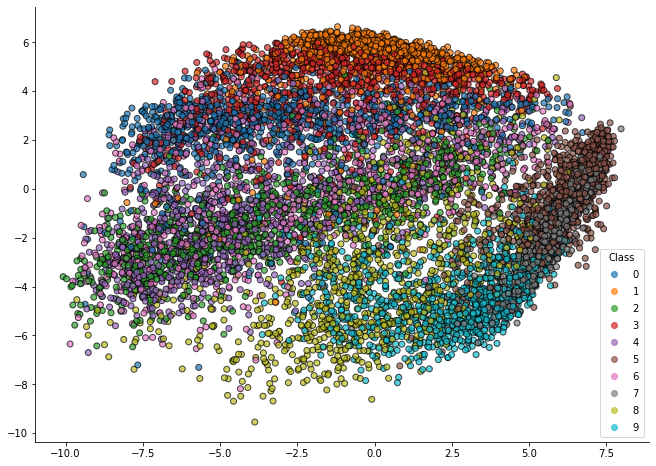

In [4]:
plot_data(pca_embeddings,Y,show_legend=True,colmap=plt.cm.tab10)

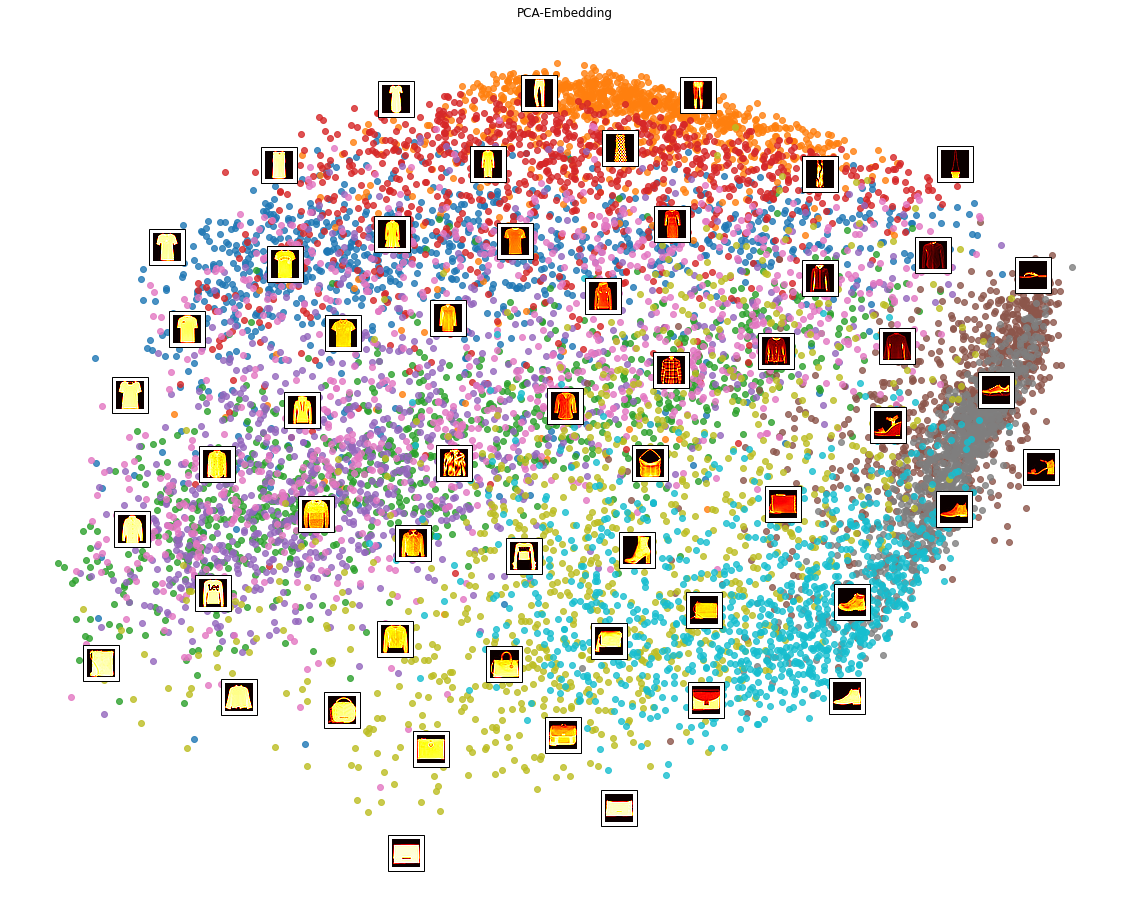

In [7]:
fig, ax = plt.subplots(1,1,figsize=(20,16))
plot_embedding(pca_embeddings,Y,X_test,ax,'PCA-Embedding')

## Running t-SNE on Fashion-MNIST

In [8]:
tsne = ManifoldLearning(X,2,method='t-SNE',num_iters=300)
t_embeddings = tsne.project()

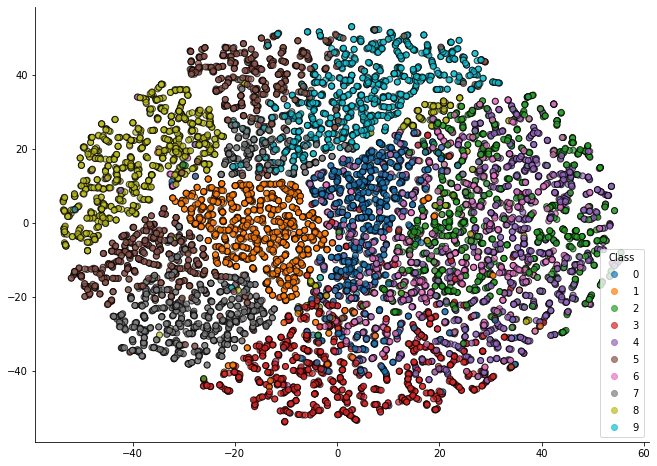

In [9]:
plot_data(t_embeddings,Y,show_legend=True,colmap=plt.cm.tab10)

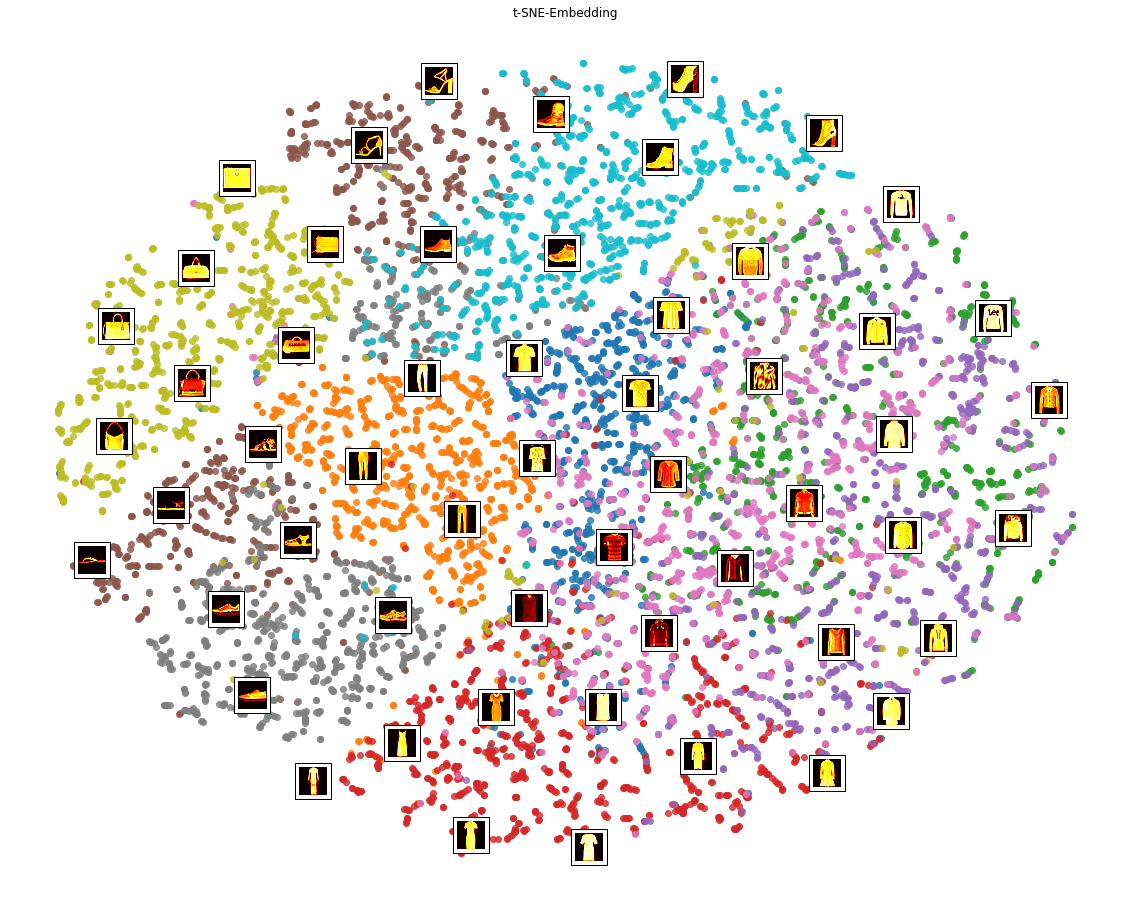

In [10]:
fig, ax = plt.subplots(1,1,figsize=(20,16))
plot_embedding(t_embeddings,Y,X_test,ax,'t-SNE-Embedding')

## Running Multiple Methods on Fashion-MNIST

In [11]:
methods = ['LLE','MDS','Isomap','Spectral','t-SNE']

embeddings = []
times = {}
for i in range(len(methods)):
        mfl = ManifoldLearning(X,2,method=methods[i])
        start_time = time()
        embeddings.append(mfl.project())
        times[methods[i]] = time() - start_time

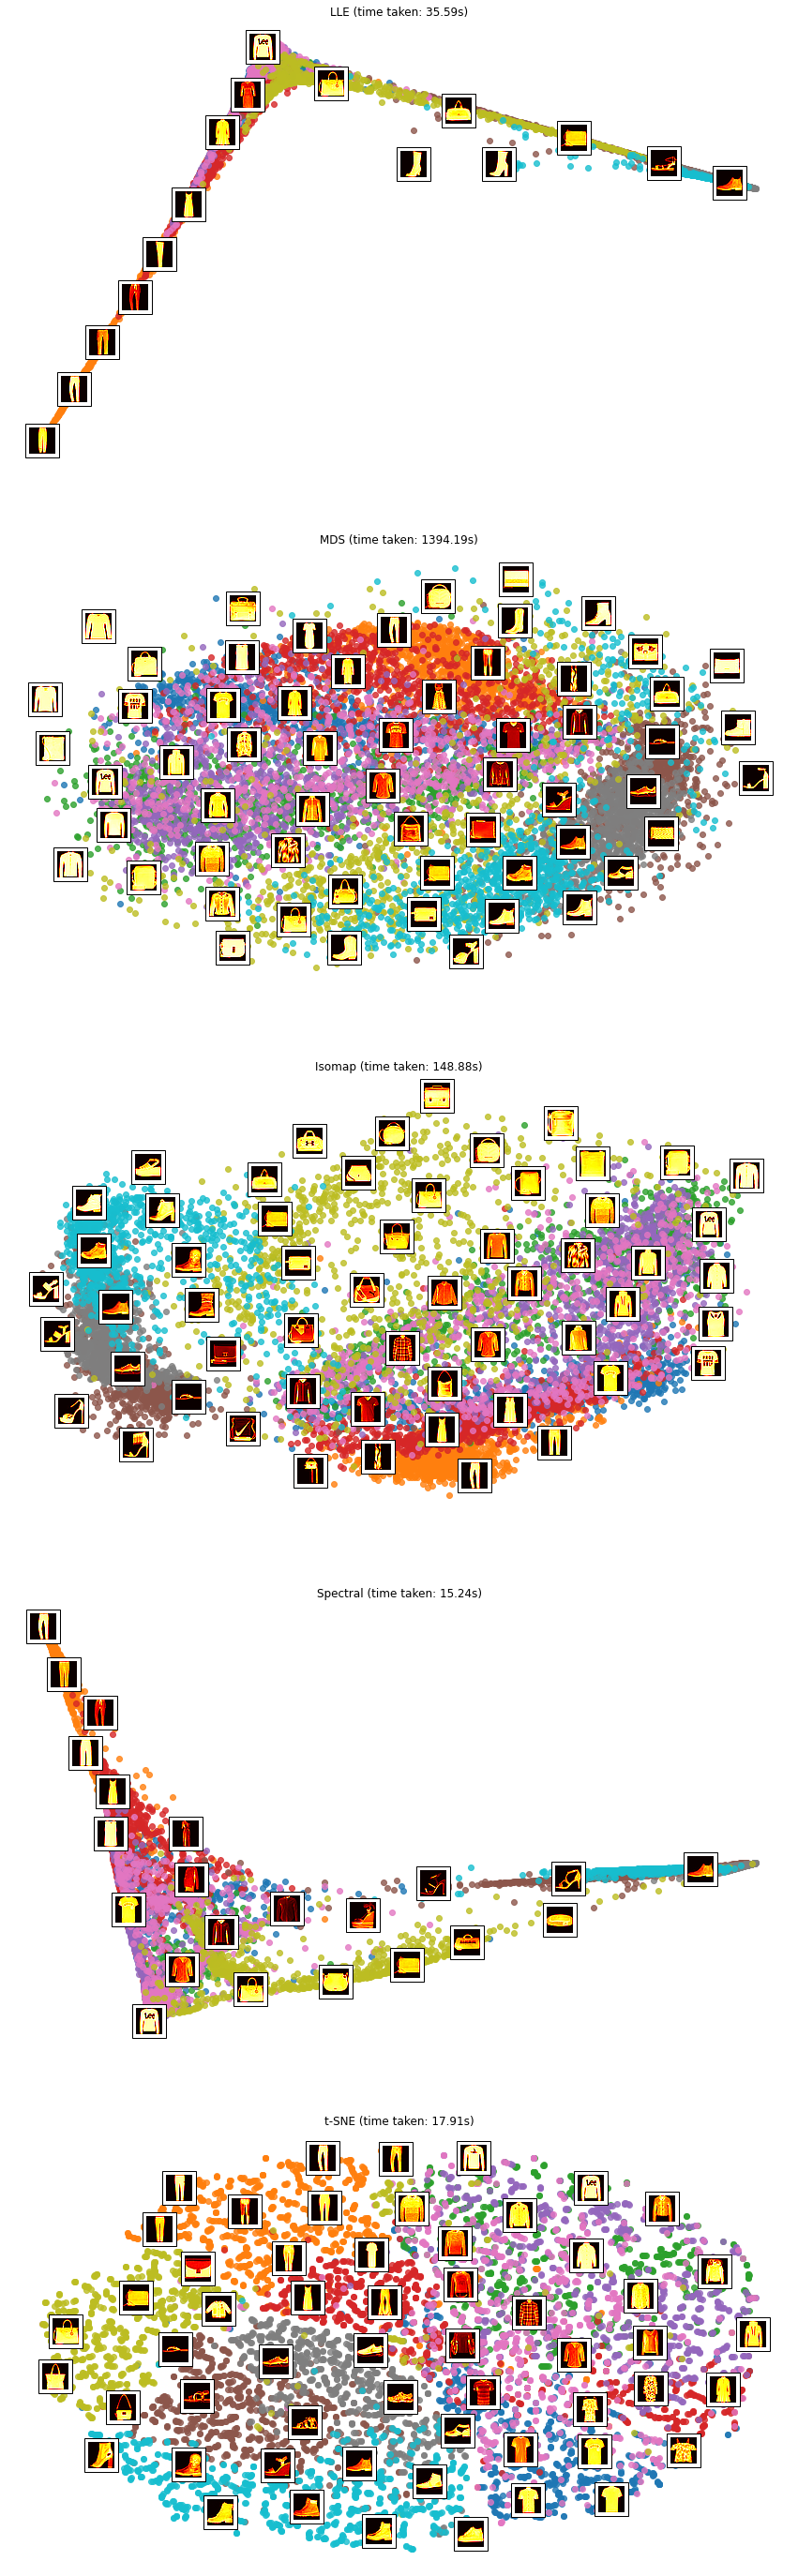

In [12]:
manifold_fig2,axes = plt.subplots(len(methods),1,figsize=(15,50))
for i in range(len(methods)):
    plot_embedding(embeddings[i],Y,X_test,axes[i],f"{methods[i]} (time taken: {times[methods[i]]:.2f}s)")